In [21]:
#!pip install pandas
#!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your Excel file
file_path = "data-sources/UT-State Tax monthly-sales-historical.xlsx"

# Read the Excel file
ut_state_tax_df = pd.read_excel(file_path, sheet_name="Table 6", skiprows=5)

# Display the first few rows of the DataFrame
ut_state_tax_df


,Month,County,Location Code,City,Economic Supersector,Taxable Sales,Unnamed: 6
0,1998-01-01 00:00:00,Beaver County,1002.0,Beaver City,Taxable Services,446755.63,NaN
1,1998-01-01 00:00:00,Beaver County,1002.0,Beaver City,Taxable Retail Trade,416092.61,NaN
2,1998-01-01 00:00:00,Beaver County,1002.0,Beaver City,Taxable Business Investment,145603.39,NaN
3,1998-01-01 00:00:00,Beaver County,1002.0,Beaver City,All Other Taxable Sales,70000.00,*
4,1998-01-01 00:00:00,Box Elder County,2017.0,Brigham,Taxable Services,2319265.04,NaN
...,...,...,...,...,...,...,...
80202,2024-06-01 00:00:00,Weber County,29040.0,South Ogden,Taxable Retail Trade,35181754.00,NaN
80203,2024-06-01 00:00:00,Weber County,29040.0,South Ogden,Taxable Business Investment,1265640.00,NaN
80204,2024-06-01 00:00:00,Weber County,29040.0,South Ogden,All Other Taxable Sales,1070505.00,NaN
80205,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Drop unnecessary rows
ut_state_tax_df = ut_state_tax_df.iloc[:-2]

In [23]:
# Reformat "Month" column into "Year" and "Month" for better readability
ut_state_tax_df['date'] = pd.to_datetime(ut_state_tax_df['Month'])

# Create new columns for year and month
ut_state_tax_df['year'] = ut_state_tax_df['date'].dt.year
ut_state_tax_df['month'] = ut_state_tax_df['date'].dt.month

# Drop unnecessary columns
ut_state_tax_df = ut_state_tax_df.drop(columns=['Month'])
ut_state_tax_df = ut_state_tax_df.drop(columns=['Unnamed: 6'])

# Lowercase columns for best practice
ut_state_tax_df.columns = ut_state_tax_df.columns.str.lower()

# Reorder dataframe
cols = ['year', 'month'] + [col for col in ut_state_tax_df.columns if col not in ['year', 'month']]
ut_state_tax_df = ut_state_tax_df[cols]
ut_state_tax_df

C:\Users\drpon\AppData\Local\Temp\ipykernel_8976\990299209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ut_state_tax_df['date'] = pd.to_datetime(ut_state_tax_df['Month'])
C:\Users\drpon\AppData\Local\Temp\ipykernel_8976\990299209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ut_state_tax_df['year'] = ut_state_tax_df['date'].dt.year
C:\Users\drpon\AppData\Local\Temp\ipykernel_8976\990299209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,year,month,county,location code,city,economic supersector,taxable sales,date
0,1998,1,Beaver County,1002.0,Beaver City,Taxable Services,446755.63,1998-01-01
1,1998,1,Beaver County,1002.0,Beaver City,Taxable Retail Trade,416092.61,1998-01-01
2,1998,1,Beaver County,1002.0,Beaver City,Taxable Business Investment,145603.39,1998-01-01
3,1998,1,Beaver County,1002.0,Beaver City,All Other Taxable Sales,70000.00,1998-01-01
4,1998,1,Box Elder County,2017.0,Brigham,Taxable Services,2319265.04,1998-01-01
...,...,...,...,...,...,...,...,...
80200,2024,6,Weber County,29037.0,Roy,All Other Taxable Sales,1972722.00,2024-06-01
80201,2024,6,Weber County,29040.0,South Ogden,Taxable Services,9344365.00,2024-06-01
80202,2024,6,Weber County,29040.0,South Ogden,Taxable Retail Trade,35181754.00,2024-06-01
80203,2024,6,Weber County,29040.0,South Ogden,Taxable Business Investment,1265640.00,2024-06-01


In [24]:
# Restrict dataframe to counties adjacent to Salt Lake City
adjacent_counties = ['Salt Lake County', 'Davis County', 'Tooele County', 'Utah County', 'Wasatch County', 'Morgan County', 'Summit County']
adjacent_counties_df = ut_state_tax_df.loc[ut_state_tax_df["county"].isin(adjacent_counties), :]
adjacent_counties_df

,year,month,county,location code,city,economic supersector,taxable sales,date
20,1998,1,Davis County,6004.0,Bountiful,Taxable Services,3834333.30,1998-01-01
21,1998,1,Davis County,6004.0,Bountiful,Taxable Retail Trade,14326492.29,1998-01-01
22,1998,1,Davis County,6004.0,Bountiful,Taxable Business Investment,967555.88,1998-01-01
23,1998,1,Davis County,6004.0,Bountiful,All Other Taxable Sales,638271.43,1998-01-01
24,1998,1,Davis County,6006.0,Centerville,Taxable Services,987737.80,1998-01-01
...,...,...,...,...,...,...,...,...
80168,2024,6,Utah County,25106.0,Springville,All Other Taxable Sales,4592268.00,2024-06-01
80169,2024,6,Wasatch County,26008.0,Heber,Taxable Services,14658156.00,2024-06-01
80170,2024,6,Wasatch County,26008.0,Heber,Taxable Retail Trade,46662474.00,2024-06-01
80171,2024,6,Wasatch County,26008.0,Heber,Taxable Business Investment,7079416.00,2024-06-01


In [29]:
# Prepare df to analyze change in sales over the years
yearly_county_df = adjacent_counties_df.groupby(['date', 'year', 'month', 'county']).sum().reset_index()
yearly_county_df = yearly_county_df.drop(columns=['city', 'economic supersector'])
yearly_county_df = yearly_county_df.rename(columns={'taxable sales': 'sales'})
yearly_county_df

,date,year,month,county,location code,sales
0,1998-01-01,1998,1,Davis County,241172.0,1.155135e+08
1,1998-01-01,1998,1,Morgan County,60028.0,1.110000e+06
2,1998-01-01,1998,1,Salt Lake County,869360.0,9.510885e+08
3,1998-01-01,1998,1,Summit County,88120.0,4.415349e+07
4,1998-01-01,1998,1,Tooele County,92192.0,1.083667e+07
...,...,...,...,...,...,...
2221,2024-06-01,2024,6,Salt Lake County,1305544.0,3.200921e+09
2222,2024-06-01,2024,6,Summit County,88120.0,9.018223e+07
2223,2024-06-01,2024,6,Tooele County,92192.0,7.188431e+07
2224,2024-06-01,2024,6,Utah County,1103284.0,1.338320e+09


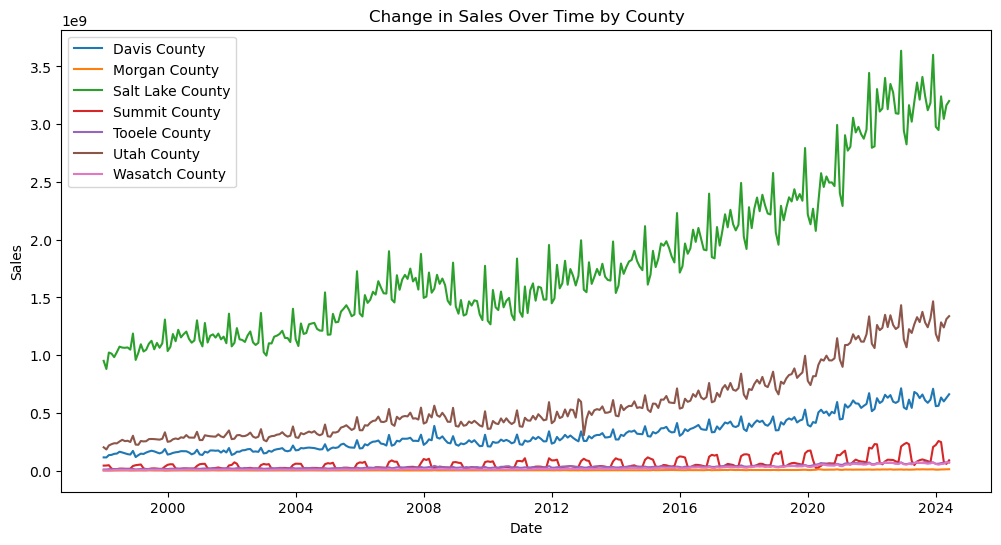

In [39]:
# Plot this change in sales over time
sales_by_county = adjacent_counties_df.groupby(['date', 'county'])['taxable sales'].sum().reset_index()
sales_by_county = sales_by_county.rename(columns={'taxable sales': 'sales'})
sales_by_county

country_sales_pivot = sales_by_county.pivot(index='date', columns='county', values='sales')

plt.figure(figsize=(12, 6))
for county in country_sales_pivot.columns:
    plt.plot(country_sales_pivot.index, country_sales_pivot[county], label=county)

plt.title('Change in Sales Over Time by County')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

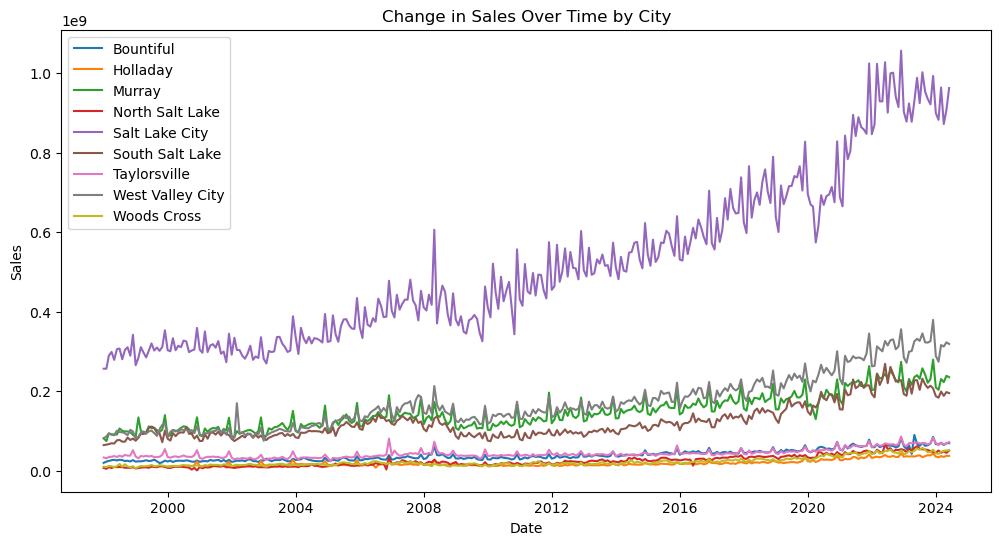

In [44]:
# Plot this change in sales over time
sales_by_city = adjacent_counties_df.groupby(['date', 'city'])['taxable sales'].sum().reset_index()
sales_by_city = sales_by_city.rename(columns={'taxable sales': 'sales'})

adjacent_cities = ['Salt Lake City', 'West Valley City', 'South Salt Lake', 'North Salt Lake', 'Woods Cross', 'Bountiful', 'Taylorsville', 'Murray', 'Holladay']
adjacent_cities_df = sales_by_city.loc[sales_by_city["city"].isin(adjacent_cities), :]

city_sales_pivot = adjacent_cities_df.pivot(index='date', columns='city', values='sales')

plt.figure(figsize=(12, 6))
for city in city_sales_pivot.columns:
    plt.plot(city_sales_pivot.index, city_sales_pivot[city], label=city)

plt.title('Change in Sales Over Time by City')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# Read 

## Comparison Data set from published tax elasticity research

In [19]:
df = pd.read_stata('data-sources\county_sales_tax_data.dta')

# Display the first few rows of the DataFrame
print(df.head())

   year  month state  fips_state_code  fips_county  total_sales_tax  \
0  2003      1    AL                1          1.0              NaN   
1  2003      2    AL                1          1.0              NaN   
2  2003      3    AL                1          1.0              NaN   
3  2003      4    AL                1          1.0              NaN   
4  2003      5    AL                1          1.0              NaN   

   state_sales_tax  local_sales_tax  county_sales_tax  city_sales_tax  \
0             0.04              NaN               NaN             NaN   
1             0.04              NaN               NaN             NaN   
2             0.04              NaN               NaN             NaN   
3             0.04              NaN               NaN             NaN   
4             0.04              NaN               NaN             NaN   

   mta_sales_tax  spd_sales_tax  other_sales_tax  
0            NaN            NaN              NaN  
1            NaN            NaN 